In [2]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
0.2
OUCH!! - No paso el test unitario
**************************************************


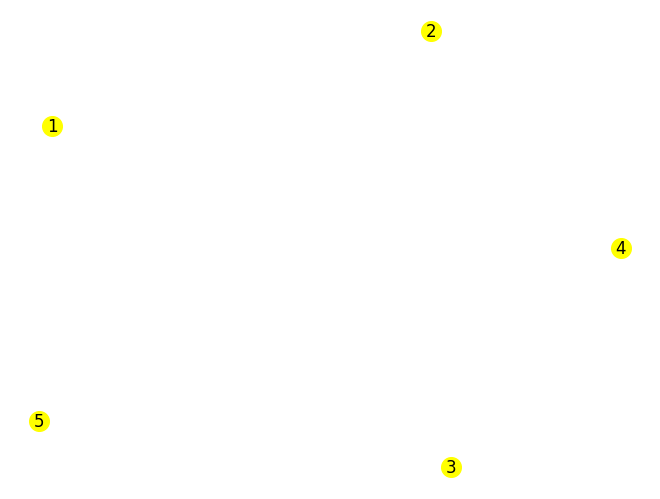

In [78]:
#ARCHIVOS DE ENTRADA
archivo_test = 'nodos_solos.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    res = obtenerMaximoRankingScore(W, p)
    print(res)
    assert(np.isclose(res, 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


Análisis:
Ranking Obtenido: Dado que no hay enlaces entre las páginas, el PageRank de cada página sería igual y posiblemente se establecería en un valor predefinido para todas las páginas.
Conclusiones: Esta estructura de grafo es poco común en la web, pero podría representar situaciones donde las páginas son completamente independientes entre sí, como documentos aislados o recursos no vinculados.

**************************************************
Test unitario 1
0.2
OUCH!! - No paso el test unitario
**************************************************


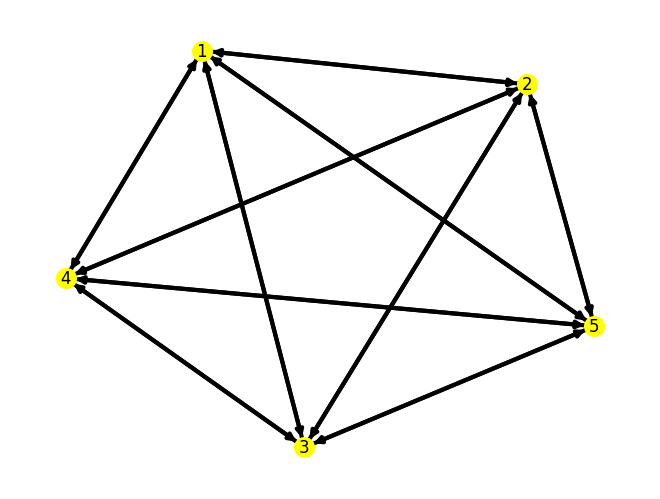

In [79]:
#ARCHIVOS DE ENTRADA
archivo_test = 'nodos_todos_con_todos.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    res = obtenerMaximoRankingScore(W, p)
    print(res)
    assert(np.isclose(res, 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)

Análisis:
Ranking Obtenido: Dado que todas las páginas están conectadas entre sí, el PageRank podría distribuirse de manera más uniforme entre las páginas. Es posible que todas las páginas tengan un PageRank similar.
Conclusiones: Esta estructura de grafo puede ser común en redes sociales o comunidades en línea donde cada usuario está interconectado con otros. El análisis del PageRank podría revelar la importancia relativa de cada página dentro de esta red interconectada.

**************************************************
Test unitario 1
0.12244569589702334
OUCH!! - No paso el test unitario
**************************************************


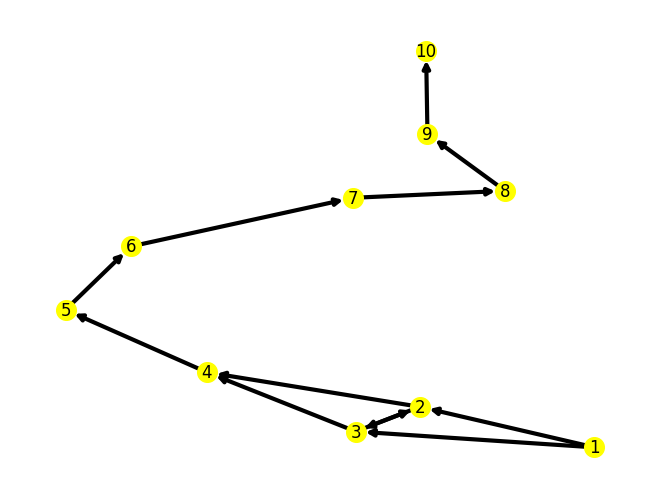

In [120]:
#ARCHIVOS DE ENTRADA
archivo_test = 'bondi.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)

# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    res = obtenerMaximoRankingScore(W, p)
    print(res)
    assert(np.isclose(res, 0.1811, atol=1e-4))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)

Análisis:
Ranking Obtenido: En este caso, el PageRank podría reflejar la importancia relativa de las páginas conectadas entre sí. Las páginas con más enlaces entrantes podrían tener un PageRank más alto.
Conclusiones: Esta estructura de grafo es más realista y puede representar una red de páginas web donde algunas páginas están más interconectadas o son más populares que otras. El análisis del PageRank puede ayudar a identificar las páginas más influyentes en esta red.

---

### Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


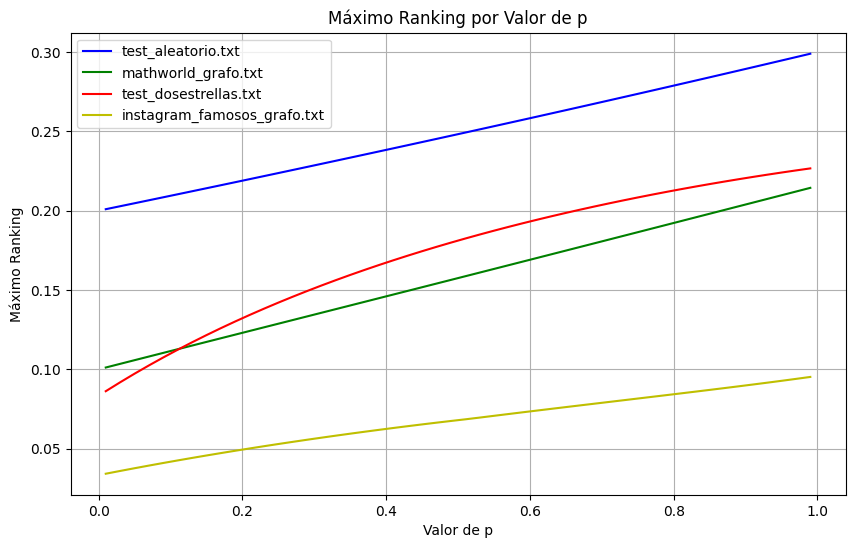

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones proporcionadas
def graficar_max_ranking_por_p(W, nombre_grafo, color, num_puntos=50):
    valores_p = np.linspace(0.01, 0.99, num_puntos)
    max_rankings = [obtenerMaximoRankingScore(W, p) for p in valores_p]
    plt.plot(valores_p, max_rankings, label=nombre_grafo, color=color)

# Lista de archivos de grafos
archivos_grafos = ['test_aleatorio.txt',
                   'mathworld_grafo.txt',
                   'test_dosestrellas.txt',
                   'instagram_famosos_grafo.txt',
                   ]

# Configuración de colores
colores = ['b', 'g', 'r', 'y']

# Creamos el gráfico
plt.figure(figsize=(10, 6))

# Iteramos sobre los archivos de grafos y generamos las líneas en el gráfico
for i, archivo_grafo in enumerate(archivos_grafos):
    nombre_grafo = archivo_grafo.split('/')[-1]  # Obtenemos el nombre del archivo
    W = leer_archivo(archivo_grafo)
    graficar_max_ranking_por_p(W, nombre_grafo, colores[i % len(colores)])

plt.xlabel('Valor de p')
plt.ylabel('Máximo Ranking')
plt.title('Máximo Ranking por Valor de p')
plt.grid(True)
plt.legend()
plt.show()


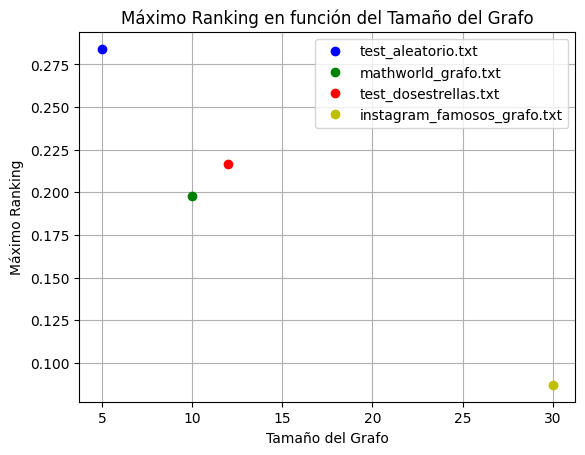

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las funciones proporcionadas

def leer_archivo(input_file_path):
    f = open(input_file_path, 'r')
    n = int(f.readline())
    m = int(f.readline())
    W = np.zeros(shape=(n,n))
    for _ in range(m):
        line = f.readline()
        i = int(line.split()[0]) - 1
        j = int(line.split()[1]) - 1
        W[j,i] = 1.0
    f.close()
    return W, n  # Devolvemos también el tamaño del grafo

def obtenerMaximoRankingScore(W, p):
    rnk, scr = calcularRanking(W, p)
    return np.max(scr)

def graficar_ranking_tamanio_grafo(archivos_grafos):
    tamanios = []
    max_rankings = []
    colores = ['b', 'g', 'r', 'y']  # Definimos colores para los grafos

    for i, archivo_grafo in enumerate(archivos_grafos):
        W, n = leer_archivo(archivo_grafo)
        tamanios.append(n)
        max_rankings.append(obtenerMaximoRankingScore(W, 0.85))  # Usamos p=0.5 como ejemplo
        plt.plot(n, max_rankings[-1], 'o', label=archivo_grafo, color=colores[i % len(colores)])  # Graficamos y asignamos un color

    plt.xlabel('Tamaño del Grafo')
    plt.ylabel('Máximo Ranking')
    plt.title('Máximo Ranking en función del Tamaño del Grafo')
    plt.grid(True)
    plt.legend() 
    plt.show()

# Lista de archivos de grafos
archivos_grafos = ['tests/test_aleatorio.txt',
                   'tests/mathworld_grafo.txt',
                   'tests/test_dosestrellas.txt',
                   'tests/instagram_famosos_grafo.txt']

# Creamos el gráfico
graficar_ranking_tamanio_grafo(archivos_grafos)
